In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile

In [ ]:
# load and preprocess
def load_dataset(directory):
    images = []
    labels = []
    for folder in os.listdir(directory):
        label = folder.split("_")[-1]
        for file in os.listdir(os.path.join(directory, folder)):
            image_path = os.path.join(directory, folder, file)
            image = cv2.imread(image_path)
            if image is not None:
 # Resize images to a fixed size
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Extract images
def extract_images(zip_file_path, extract_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

In [ ]:
# Path to the ZIP file
train_zip_path = "/content/images-train.zip"

In [ ]:
# Directory to extract the contents
train_extract_path = "/content/train"

In [ ]:
# Extract the contents of the training dataset
extract_images(train_zip_path, train_extract_path)

In [ ]:
# Load and preprocess the image dataset
X_train, y_train = load_dataset(train_extract_path)

In [ ]:
# Data preprocessing
X_train = X_train / 255.0

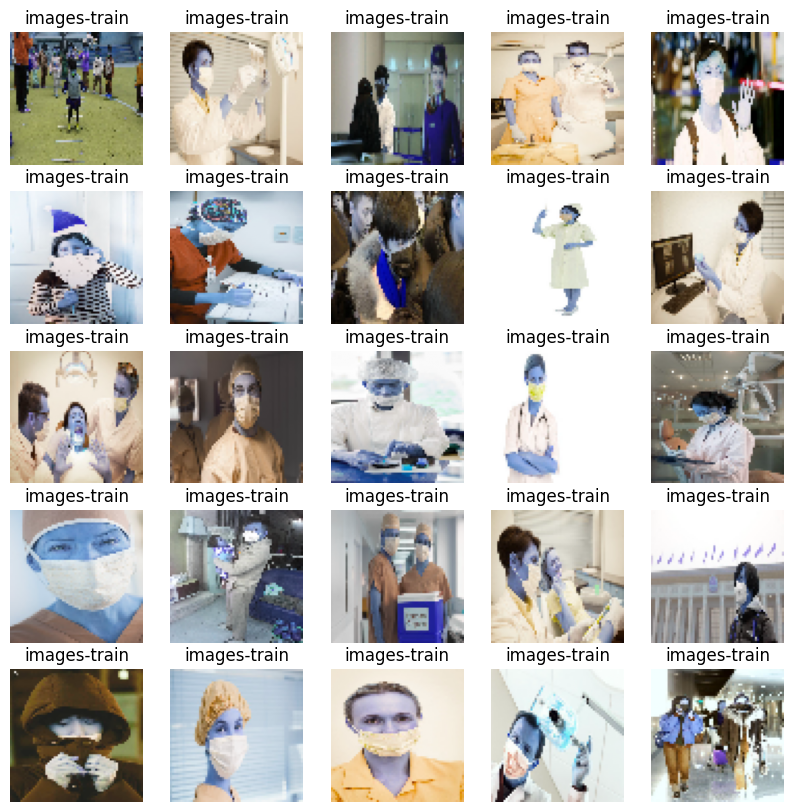

In [ ]:
# Data visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [ ]:
# Data analysis
unique_labels, counts = np.unique(y_train, return_counts=True)
print("Class Distribution:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

Class Distribution:
images-train: 1351


In [ ]:
# Model training
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

X_train_flat = X_train.reshape(X_train.shape[0], -1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_flat, y_train_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
rf_predictions = rf_classifier.predict(X_train_flat)
print("Random Forest Classification Report:")
print(classification_report(y_train_encoded, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1351

    accuracy                           1.00      1351
   macro avg       1.00      1.00      1.00      1351
weighted avg       1.00      1.00      1.00      1351



In [ ]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Deep learning model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


In [ ]:
# Convert labels to integers (0 or 1)
y_train = (y_train == 'masked').astype(int)
y_val = (y_val == 'masked').astype(int)


In [ ]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
33/33 [==============================] - 10s 281ms/step - loss: 0.0285 - accuracy: 0.9704 - val_loss: 1.8422e-30 - val_accuracy: 1.0000
Epoch 2/10
33/33 [==============================] - 9s 258ms/step - loss: 1.1484e-27 - accuracy: 1.0000 - val_loss: 2.1827e-33 - val_accuracy: 1.0000
Epoch 3/10
33/33 [==============================] - 8s 226ms/step - loss: 1.6687e-30 - accuracy: 1.0000 - val_loss: 1.6823e-33 - val_accuracy: 1.0000
Epoch 4/10
33/33 [==============================] - 12s 345ms/step - loss: 3.6360e-32 - accuracy: 1.0000 - val_loss: 1.6677e-33 - val_accuracy: 1.0000
Epoch 5/10
33/33 [==============================] - 9s 258ms/step - loss: 1.4798e-28 - accuracy: 1.0000 - val_loss: 1.6675e-33 - val_accuracy: 1.0000
Epoch 6/10
33/33 [==============================] - 8s 229ms/step - loss: 4.2942e-27 - accuracy: 1.0000 - val_loss: 1.6675e-33 - val_accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 14s 404ms/step - loss: 4.6894e-30 - accuracy: 1.00

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


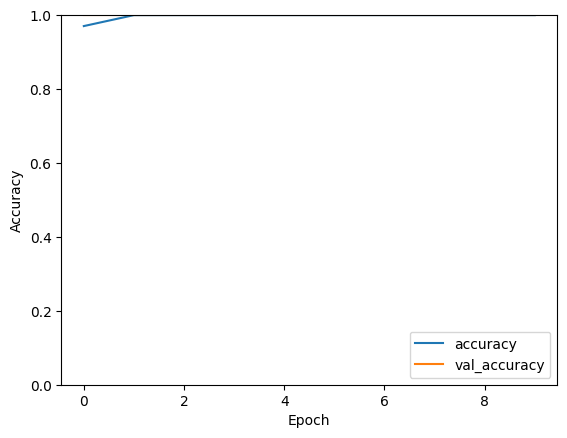

In [ ]:
# Plot training history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Evaluate the model
model.evaluate(X_val, y_val)

9/9 [==============================] - 1s 72ms/step - loss: 1.6675e-33 - accuracy: 1.0000


[1.667526531375742e-33, 1.0]